# 0. Import Library

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

import scipy.stats

![](https://onlinelibrary.wiley.com/cms/asset/ea1d3bd8-afd7-4914-b645-74d424b6690d/advs3654-fig-0002-m.jpg)

# 1. Input Data

In [32]:
df = pd.read_csv('data/simple_loan.csv')

# 2. Data Preprocessing

## 2.1 Exploratory Data Analysis (EDA)

In [33]:
df.head()

,age,employed,own_house,credit,target
0,young,False,n,fair,no
1,young,False,n,good,no
2,young,True,n,good,yes
3,young,True,y,fair,yes
4,young,False,n,fair,no


In [34]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        17 non-null     object
 1   employed   17 non-null     bool  
 2   own_house  17 non-null     object
 3   credit     17 non-null     object
 4   target     17 non-null     object
dtypes: bool(1), object(4)
memory usage: 689.0+ bytes


In [35]:
df.describe()

,age,employed,own_house,credit,target
count,17,17,17,17,17
unique,3,2,2,3,2
top,young,False,n,good,yes
freq,6,11,10,6,11


In [36]:
print(df.dtypes)


age          object
employed       bool
own_house    object
credit       object
target       object
dtype: object


## 2.2 Data Cleaning

### - Missing Value

In [37]:
df.isnull().sum()

age          0
employed     0
own_house    0
credit       0
target       0
dtype: int64

### - Inconsistent Data

### - Outliers

## 2.3 Data Transformation

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
def labelEncode(data, columns):
    columns_ = []
    for i in columns:
        lb = LabelEncoder()
        lb_ = lb.fit_transform(data[i].astype(str))
        data[i+'_Encoded']=lb_
        columns_.append(i+'_Encoded')
    return columns_,lb

In [40]:
columns = ['age', 'employed', 'own_house', 'credit', 'target']
enc_columns, lb=labelEncode(df, columns)

In [41]:
df.sample(15)

,age,employed,own_house,credit,target,age_Encoded,employed_Encoded,own_house_Encoded,credit_Encoded,target_Encoded
11,old,False,y,good,yes,1,0,1,2,1
12,old,True,n,good,yes,1,1,0,2,1
7,middle,True,y,good,yes,0,1,1,2,1
9,middle,False,y,excellent,yes,0,0,1,0,1
5,middle,False,n,fair,no,0,0,0,1,0
13,old,True,n,excellent,yes,1,1,0,0,1
15,old,False,n,excellent,yes,1,0,0,0,1
8,middle,False,y,excellent,yes,0,0,1,0,1
16,young,True,y,fair,yes,2,1,1,1,1
14,old,False,n,fair,no,1,0,0,1,0


In [56]:
for i in enc_columns:
    print(i[:-8])
    print(' ',df[i[:-8]].unique())
    print(' ',df[i].unique())
    print('--'*15)

age
  ['young' 'middle' 'old']
  [2 0 1]
------------------------------
employed
  [False  True]
  [0 1]
------------------------------
own_house
  ['n' 'y']
  [0 1]
------------------------------
credit
  ['fair' 'good' 'excellent']
  [1 2 0]
------------------------------
target
  ['no' 'yes']
  [0 1]
------------------------------


## [Optional] Export เป็นไฟล์เมื่อทำ Data Cleaning เสร็จแล้ว

In [ ]:
#data.to_csv('รหัส.csv',index=False)
#data.to_excel('รหัส.xlsx',index=False)

## 2.4 ตรวจสอบค่าสหสัมพันธ์ของตัวแปร x, y

In [57]:
df.corr()

,employed,age_Encoded,employed_Encoded,own_house_Encoded,credit_Encoded,target_Encoded
employed,1.000000,0.252714,1.000000,0.132410,0.252714,0.545455
age_Encoded,0.252714,1.000000,0.252714,-0.210332,0.177419,-0.099281
employed_Encoded,1.000000,0.252714,1.000000,0.132410,0.252714,0.545455
own_house_Encoded,0.132410,-0.210332,0.132410,1.000000,-0.210332,0.617914
credit_Encoded,0.252714,0.177419,0.252714,-0.210332,1.000000,-0.252714
target_Encoded,0.545455,-0.099281,0.545455,0.617914,-0.252714,1.000000


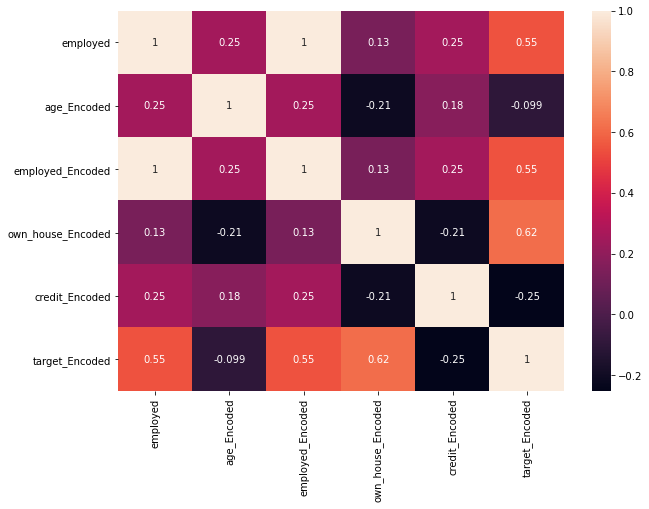

In [58]:
plt.rcParams['figure.figsize'] = 10,7 
sns.heatmap(df.corr(), annot=True);

## 2.5 การกำหนด Feature / Target

In [62]:
DataMatrix = df.values
DataMatrix.shape

(17, 10)

In [63]:
feature_cols = ['age_Encoded', 'employed_Encoded', 'own_house_Encoded', 'credit_Encoded']
X = df[feature_cols].values
Y = df.target_Encoded.values

## 2.6 Data Preparation (แบ่งข้อมูลสำหรับ Training / Testing)

In [64]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.3, random_state=0)

# 3. Modelling: Naive Bayes

![](https://lh5.googleusercontent.com/srzYqxIUyKR3cpST76ri4fHxfV17bwwbMds6RHpkI0XBHkoL3gY2b5eSvHbjqa6j2Ra6kakBz2CSFkhLQwmwVHg_wY7LYxUYkrwV_ZO-RoC-fIRiJeJj2KQH7e6lmPGcz2EzL81aRIVsDRGiDzTNAbs)

![](https://atoti.io/wp-content/uploads/2020/11/0-GqPlDQ4VkujUJ3Fc.png)

In [65]:
from sklearn.naive_bayes import GaussianNB

## 3.1 Training Process

In [66]:
model = GaussianNB()
model.fit(X_Train, Y_Train)

GaussianNB()

In [67]:
model.score(X_Train, Y_Train)

1.0

## 3.2 Testing Process

In [68]:
y_predict = model.predict(X_Test)

In [69]:
y_predict_class = lb.inverse_transform(y_predict)

In [70]:
for res, label in zip(y_predict, y_predict_class):
    print('Result: {} - {}'.format(res, label))

Result: 1 - yes
Result: 1 - yes
Result: 1 - yes
Result: 1 - yes
Result: 1 - yes
Result: 0 - no


# 4. Model Evaluation

## 4.1 Split Test

In [71]:
from sklearn import metrics

In [72]:
cnf_matrix = metrics.confusion_matrix(Y_Test, y_predict)
cnf_matrix

array([[1, 2],
       [0, 3]], dtype=int64)

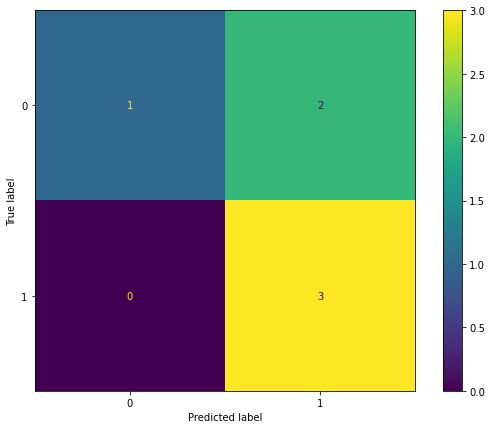

In [73]:
plt.rcParams['figure.figsize'] = 10,7 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

In [74]:
from sklearn.metrics import classification_report
target_names = ['No', 'Yes']
print(classification_report(Y_Test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

          No       1.00      0.33      0.50         3
         Yes       0.60      1.00      0.75         3

    accuracy                           0.67         6
   macro avg       0.80      0.67      0.62         6
weighted avg       0.80      0.67      0.62         6



## 4.2 Cross Validation Test

In [75]:
from sklearn.model_selection import cross_val_score

In [76]:
cvs = cross_val_score(model, X, Y, cv=2)

In [77]:
print('Cross Validation Score {}'.format(cvs))

Cross Validation Score [1.    0.625]


In [78]:
print('Mean: {:4f}'.format(cvs.mean()))

Mean: 0.812500


# [Optional] Save Machine Learning Models

In [79]:
#import pickle
#filename = 'pickle_รหัสนศ.sav'
#pickle.dump(model, open(filename, 'wb'))

# 5. Prediction

![](https://cdn.pic.in.th/file/picinth/Predict_NB.jpeg)

In [80]:
X_input = [[0,1,1,1], [1,0,0,2], [1,1,0,1], [2,0,1,1]]

In [81]:
y_predict_in = model.predict(X_input)

In [82]:
print(y_predict_in)

[1 1 1 1]


In [83]:
y_predict_class = lb.inverse_transform(y_predict_in)

In [84]:
for res, label in zip(y_predict_in, y_predict_class):
    print('Result: {} - {}'.format(res, label))

Result: 1 - yes
Result: 1 - yes
Result: 1 - yes
Result: 1 - yes
